<center><h1>Assignment 5</h1></center>

## Details
1. Author :Shashikant Bahekar
2. Roll Number : 33302
3. Batch : K-11
4. Class : TE-11

## Problem Statement
### Perform the following operations using Python on the Air quality and Heart Diseases data sets
1. Data cleaning
2. Data integration
3. Data transformation
4. Error correcting
5. Data model building

### Dataset details
1. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
2. The "goal" field refers to the presence of heart disease in the patient. 
3. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
4. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./processed.cleveland.csv", names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# a. Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
df[df.ca == "?"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
df[df.thal == "?"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [8]:
df.thal.mode()

0    3.0
Name: thal, dtype: object

In [9]:
# 44 ca: number of major vessels (0-3) colored by flourosopy
# put it as zero (i.e the mode) because unknown
df.loc[df.ca == "?", "ca"] = "0.0"
df[df.ca == "?"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [10]:
# 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# 3.0 is the mode
df.loc[df.thal == "?", "thal"] = "3.0"
df[df.thal == "?"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [12]:
df.num.unique()

array([0, 2, 1, 3, 4])

In [13]:
'''
58 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

Assuming that 2,3,4 are higher degrees of narrowing, we can say that 1 to 4 is presence of heart disease and 
0 is absence of heart disease
'''

df.loc[df.num > 1, "num"].unique()

array([2, 3, 4])

In [14]:
df.loc[df.num > 1, "num"] = 1
df.loc[df.num > 1, "num"]

Series([], Name: num, dtype: int64)

# Exploratory Data Analysis

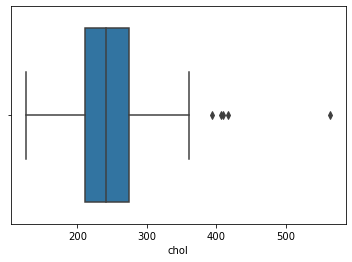

In [15]:
sns.boxplot(x = df.chol);

In [16]:
df.ca = df.ca.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 33.3+ KB


In [17]:
df.thal = df.thal.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


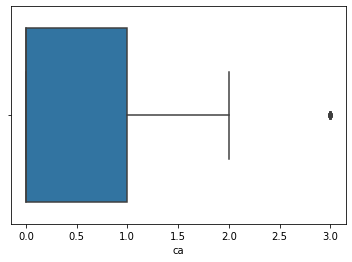

In [18]:
sns.boxplot(x = df.ca);

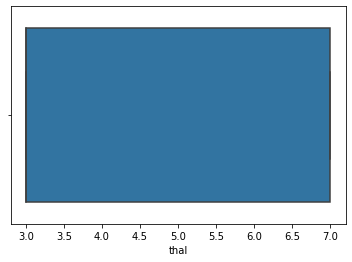

In [19]:
sns.boxplot(x = df.thal);

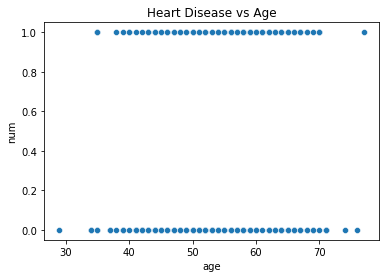

In [20]:
plt.title("Heart Disease vs Age")
sns.scatterplot(x=df.age, y=df.num);

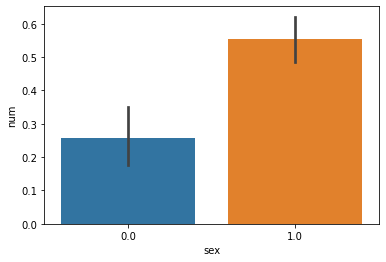

In [21]:
sns.barplot(x=df.sex, y=df.num);

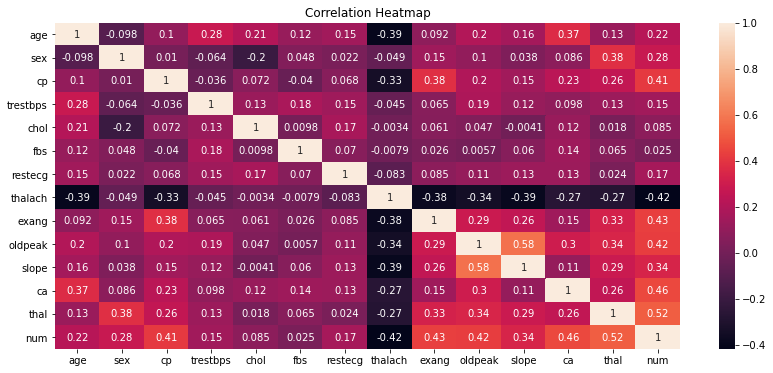

In [22]:
plt.figure(figsize=(14,6))
plt.title("Correlation Heatmap")
sns.heatmap(data = df.corr() ,annot=True);

In [23]:
df.aggregate(['sum', 'mean', 'max', 'min'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
sum,16495.000000,206.000000,957.000000,39902.000000,74748.000000,45.000000,300.000000,45331.000000,99.000000,315.000000,485.00000,201.000000,1431.000000,139.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.60066,0.663366,4.722772,0.458746
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.00000,3.000000,7.000000,1.000000
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.00000,0.000000,3.000000,0.000000


# b. Data integration

Not needed as we're only dealing with one data source that has been cleaned (refer part a above)

# c. Data transformation

Performing Normalization (min-max scaling)

In [24]:
df_norm = (df - df.min())/(df.max() - df.min())
df_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


In [25]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


# d. Error correcting

Not needed here as handled in Data Cleaning step

# e. Data model building

To try: Decision Tree, KNN, Linear Regression, Logistic Regression and Naive Bayes

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier



https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/#:~:text=Python%20scikit%2Dlearn%20provides%20a,process%20that%20can%20be%20evaluated.

https://scikit-learn.org/stable/modules/compose.html

https://stats.stackexchange.com/questions/399430/does-categorical-variable-need-normalization-standardization

https://vitalflux.com/k-fold-cross-validation-python-example/

In [27]:
x_train = df_norm.iloc[:, 0:13]
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00


In [28]:
y_train = pd.DataFrame(df_norm.iloc[:, 13])
y_train.head()

,num
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [29]:
def fit_and_test_model(pipeline):

    # Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
    stratKfold = StratifiedKFold(n_splits=10)

    kfold = stratKfold.split(x_train, y_train)
    scores = []

    for k, (train, test) in enumerate(kfold):
        pipeline.fit(x_train.iloc[train, :], y_train.iloc[train])
        score = pipeline.score(x_train.iloc[test, :], y_train.iloc[test])
        scores.append(score)
        #print("Fold: %2d, training/test split distribution: %s, Accuracy: %.3f" % (k+1, np.bincount(y_train.iloc[train]), score))
        print("Fold: %2d,  Accuracy: %.3f" % (k+1, score))

    print('\n\nCross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [30]:
# create an instance of pipeline for Decision Tree
pipeline = make_pipeline(DecisionTreeClassifier(criterion="gini", min_samples_split=10))

fit_and_test_model(pipeline)

Fold:  1,  Accuracy: 0.774
Fold:  2,  Accuracy: 0.806
Fold:  3,  Accuracy: 0.871
Fold:  4,  Accuracy: 0.833
Fold:  5,  Accuracy: 0.767
Fold:  6,  Accuracy: 0.700
Fold:  7,  Accuracy: 0.500
Fold:  8,  Accuracy: 0.767
Fold:  9,  Accuracy: 0.700
Fold: 10,  Accuracy: 0.800


Cross Validation accuracy: 0.752 +/- 0.098


In [31]:
from sklearn.linear_model import LogisticRegression 

In [32]:
# create an instance of pipeline for Decision Tree
pipeline = make_pipeline(LogisticRegression())

fit_and_test_model(pipeline)

Fold:  1,  Accuracy: 0.871
Fold:  2,  Accuracy: 0.806
Fold:  3,  Accuracy: 0.839
Fold:  4,  Accuracy: 0.967
Fold:  5,  Accuracy: 0.800
Fold:  6,  Accuracy: 0.767
Fold:  7,  Accuracy: 0.867
Fold:  8,  Accuracy: 0.867
Fold:  9,  Accuracy: 0.733
Fold: 10,  Accuracy: 0.867


Cross Validation accuracy: 0.838 +/- 0.062


/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [33]:
from sklearn.linear_model import LinearRegression

# create an instance of pipeline for Decision Tree
pipeline = make_pipeline(LinearRegression())

fit_and_test_model(pipeline)

Fold:  1,  Accuracy: 0.578
Fold:  2,  Accuracy: 0.472
Fold:  3,  Accuracy: 0.563
Fold:  4,  Accuracy: 0.624
Fold:  5,  Accuracy: 0.505
Fold:  6,  Accuracy: 0.306
Fold:  7,  Accuracy: 0.503
Fold:  8,  Accuracy: 0.500
Fold:  9,  Accuracy: 0.253
Fold: 10,  Accuracy: 0.496


Cross Validation accuracy: 0.480 +/- 0.110


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# create an instance of pipeline for Decision Tree
pipeline = make_pipeline(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))

fit_and_test_model(pipeline)

Fold:  1,  Accuracy: 0.806
Fold:  2,  Accuracy: 0.806
Fold:  3,  Accuracy: 0.806
Fold:  4,  Accuracy: 0.900
Fold:  5,  Accuracy: 0.767
Fold:  6,  Accuracy: 0.767
Fold:  7,  Accuracy: 0.767
Fold:  8,  Accuracy: 0.900
Fold:  9,  Accuracy: 0.700
Fold: 10,  Accuracy: 0.833


Cross Validation accuracy: 0.805 +/- 0.059


/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/neil/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 